In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('~/ga/projects/capstone_data/data/delaysQ4_2018_cleaned.csv')

In [3]:
data.head()

,Unnamed: 0,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,...,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,total_delay
0,0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,...,-2.0,-17.0,1670.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
1,1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,...,-2.0,-25.0,1670.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
2,2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,...,2.0,-13.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
3,3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,...,-3.0,-12.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
4,4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,...,1.0,-7.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0


In [4]:
data.shape

(1775112, 25)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1775112.0,897176.320690,518597.895225,0.0,448142.75,895959.5,1346549.25,1796120.0
month,1775112.0,10.986087,0.820784,10.0,10.00,11.0,12.00,12.0
day_of_month,1775112.0,15.804770,8.819088,1.0,8.00,16.0,23.00,31.0
day_of_week,1775112.0,3.929362,2.008412,1.0,2.00,4.0,6.00,7.0
op_carrier_fl_num,1775112.0,2612.562232,1842.974919,1.0,1066.00,2180.0,4014.00,7909.0
dep_delay,1775112.0,8.419352,42.617156,-39.0,-6.00,-2.0,5.00,2109.0
arr_delay,1775112.0,3.803098,44.869790,-59.0,-14.00,-6.0,7.00,2153.0
distance,1775112.0,796.862081,593.713766,31.0,363.00,631.0,1027.00,4983.0
carrier_delay,1775112.0,0.046855,0.211327,0.0,0.00,0.0,0.00,1.0
weather_delay,1775112.0,0.004480,0.066781,0.0,0.00,0.0,0.00,1.0


In [6]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775112 entries, 0 to 1775111
Data columns (total 24 columns):
month                  int64
day_of_month           int64
day_of_week            int64
fl_date                object
op_carrier             object
op_carrier_fl_num      int64
origin                 object
origin_city_name       object
origin_state_abr       object
origin_state_nm        object
dest                   object
dest_city_name         object
dest_state_abr         object
dest_state_nm          object
dep_delay              float64
arr_delay              float64
distance               float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
carrier                object
total_delay            float64
dtypes: float64(9), int64(4), object(11)
memory usage: 325.0+ MB


In [8]:
data.isna().sum()

month                  0
day_of_month           0
day_of_week            0
fl_date                0
op_carrier             0
op_carrier_fl_num      0
origin                 0
origin_city_name       0
origin_state_abr       0
origin_state_nm        0
dest                   0
dest_city_name         0
dest_state_abr         0
dest_state_nm          0
dep_delay              0
arr_delay              0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
carrier                0
total_delay            0
dtype: int64

In [9]:
data['carrier'].value_counts()

SouthWest            336983
Delta Connection     251520
Delta AirLines       232741
American Airlines    226595
American Eagle       218926
United Airlines      157882
JetBlue               74341
Alaska Airlines       62157
MESA                  55036
Spirit Airlines       42982
United Express        42048
Frontier Airlines     29974
Allegiant Air         22742
Hawaiian Airlines     21185
Name: carrier, dtype: int64

In [10]:
data[data['carrier'] == "MESA"]['origin'].value_counts()

DFW    9092
IAH    8345
IAD    5970
PHX    5223
ELP    1061
       ... 
RSW       4
TPA       3
GSO       2
ALB       2
PBI       1
Name: origin, Length: 109, dtype: int64

In [11]:
data[data['carrier'] == "MESA"]['dest'].value_counts()

DFW    9039
IAH    8317
IAD    5959
PHX    5211
ELP    1068
       ... 
RSW       4
TPA       3
GSO       2
ALB       2
PBI       1
Name: dest, Length: 109, dtype: int64

In [12]:
data_main = data[data['carrier'] != "MESA"]

In [13]:
data_mesa = data[data['carrier'] == "MESA"]

In [14]:
data_mesa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55036 entries, 146575 to 1596841
Data columns (total 24 columns):
month                  55036 non-null int64
day_of_month           55036 non-null int64
day_of_week            55036 non-null int64
fl_date                55036 non-null object
op_carrier             55036 non-null object
op_carrier_fl_num      55036 non-null int64
origin                 55036 non-null object
origin_city_name       55036 non-null object
origin_state_abr       55036 non-null object
origin_state_nm        55036 non-null object
dest                   55036 non-null object
dest_city_name         55036 non-null object
dest_state_abr         55036 non-null object
dest_state_nm          55036 non-null object
dep_delay              55036 non-null float64
arr_delay              55036 non-null float64
distance               55036 non-null float64
carrier_delay          55036 non-null float64
weather_delay          55036 non-null float64
nas_delay              55036

In [15]:
#UA hubs
UA_hubs = ['IAH','IAD','ORD', 'DEN']
AA_hubs = ['LAX', 'PHX', 'CLT', 'DFW']

In [16]:
data_mesa['carrier'] = np.where(data_mesa['origin'].isin(UA_hubs),'United Express',data_mesa['carrier'])
data_mesa['carrier'] = np.where(data_mesa['origin'].isin(AA_hubs),'American Eagle',data_mesa['carrier'])
data_mesa['carrier'] = np.where(data_mesa['dest'].isin(UA_hubs),'United Express',data_mesa['carrier'])
data_mesa['carrier'] = np.where(data_mesa['dest'].isin(AA_hubs),'American Eagle',data_mesa['carrier'])   

# data_mesa[data_mesa['origin'] in UA_hubs.any()]

/Users/ilyakvyatkovskiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ilyakvyatkovskiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ilyakvyatkovskiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [17]:
data_mesa['carrier'].value_counts()

American Eagle    28023
United Express    27013
Name: carrier, dtype: int64

In [18]:
data = pd.concat([data_main, data_mesa], axis=0)

In [19]:
data.shape

(1775112, 24)

In [20]:
data['carrier'].value_counts()

SouthWest            336983
Delta Connection     251520
American Eagle       246949
Delta AirLines       232741
American Airlines    226595
United Airlines      157882
JetBlue               74341
United Express        69061
Alaska Airlines       62157
Spirit Airlines       42982
Frontier Airlines     29974
Allegiant Air         22742
Hawaiian Airlines     21185
Name: carrier, dtype: int64

In [21]:
DL = ['Delta Connection', 'Delta AirLines']
AA = ['American Eagle', 'American Airlines']
UA = ['United Airlines', 'United Express']

In [22]:
data['carrier'] = np.where(data['carrier'].isin(DL),'Delta',data['carrier'])
data['carrier'] = np.where(data['carrier'].isin(AA),'American',data['carrier'])
data['carrier'] = np.where(data['carrier'].isin(UA),'United',data['carrier'])

In [23]:
flights = pd.DataFrame(data = data['carrier'].value_counts(), columns=['carrier'])
flights.head(10)



,carrier
Delta,484261
American,473544
SouthWest,336983
United,226943
JetBlue,74341
Alaska Airlines,62157
Spirit Airlines,42982
Frontier Airlines,29974
Allegiant Air,22742
Hawaiian Airlines,21185


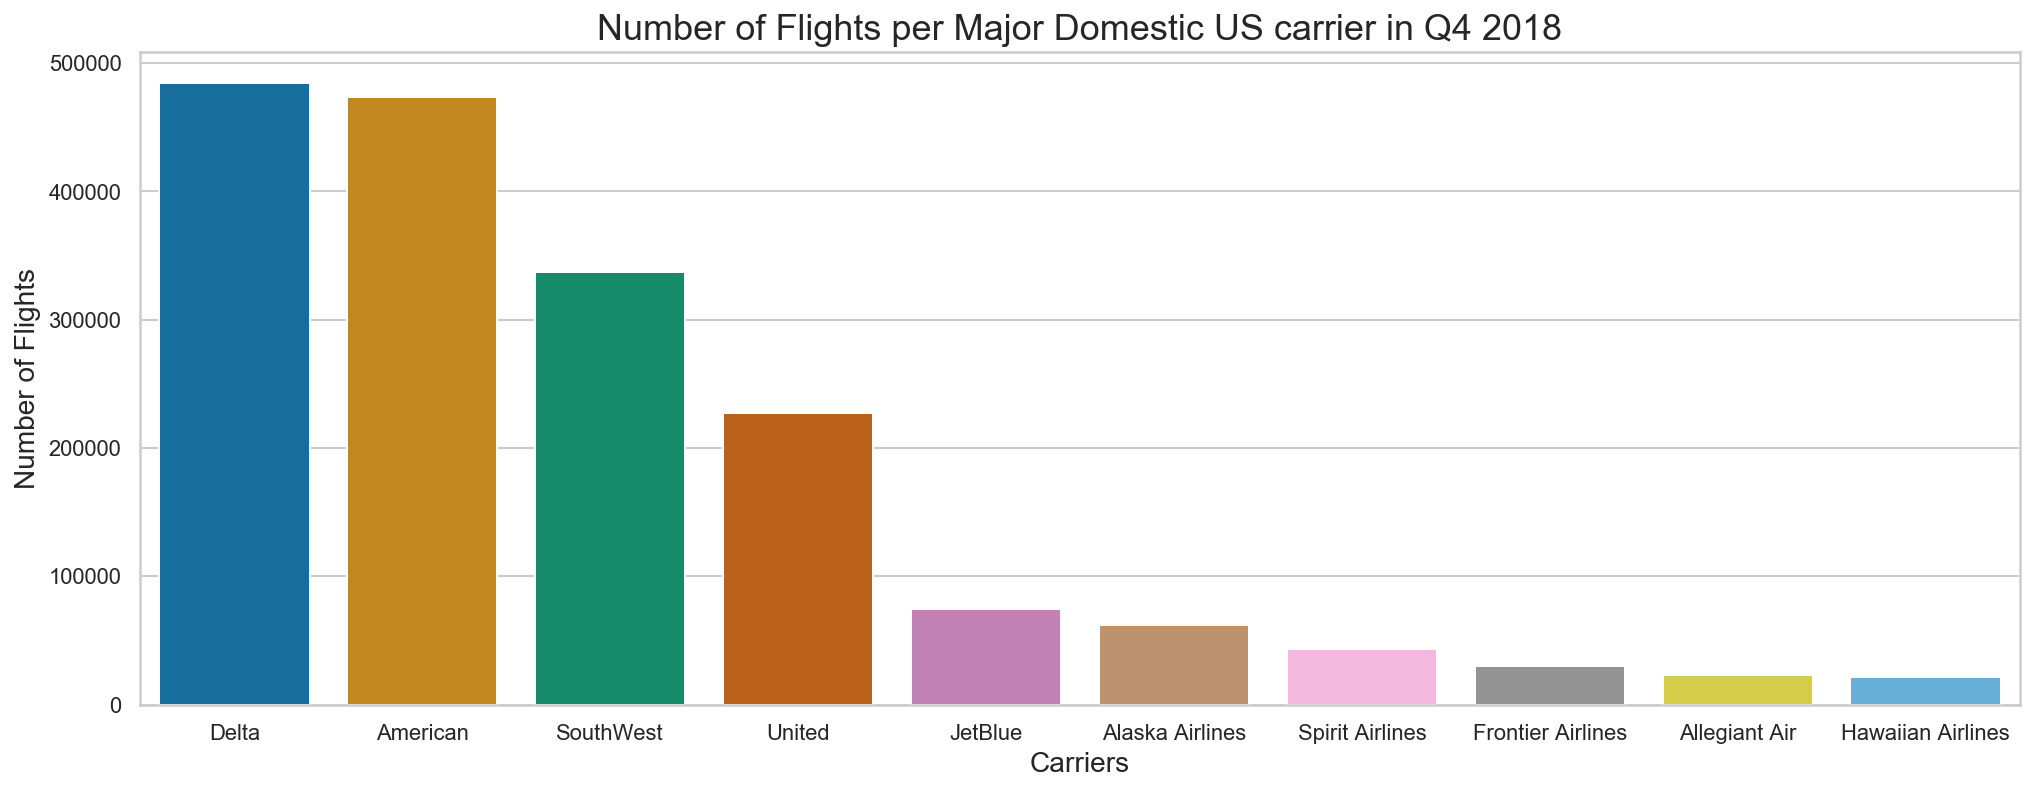

In [24]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15,6))

#Color coding is based on https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
sns.set_color_codes("colorblind")
pal = sns.color_palette("colorblind", len(flights))
rank = flights['carrier'].argsort().argsort()

sns.barplot(x=flights.index, y=flights['carrier'], data=flights,
            label="Number of Flights", palette=np.array(pal[::-1])[rank]);


# ax.legend( loc="upper right", frameon=True)
# sns.despine(left=True, bottom=True)
plt.title(label = "Number of Flights per Major Domestic US carrier in Q4 2018", fontsize=18);
plt.ylabel("Number of Flights", fontsize=14);
plt.xlabel("Carriers", fontsize=14);

In [25]:
data.groupby('carrier').describe()

month                                               \
                      count       mean       std   min   25%   50%   75%   
carrier                                                                    
Alaska Airlines     62157.0  10.986116  0.821464  10.0  10.0  11.0  12.0   
Allegiant Air       22742.0  11.001803  0.816126  10.0  10.0  11.0  12.0   
American           473544.0  10.985454  0.820970  10.0  10.0  11.0  12.0   
Delta              484261.0  10.979466  0.822481  10.0  10.0  11.0  12.0   
Frontier Airlines   29974.0  10.983686  0.819902  10.0  10.0  11.0  12.0   
Hawaiian Airlines   21185.0  11.003021  0.822750  10.0  10.0  11.0  12.0   
JetBlue             74341.0  11.006847  0.819814  10.0  10.0  11.0  12.0   
SouthWest          336983.0  10.994380  0.818574  10.0  10.0  11.0  12.0   
Spirit Airlines     42982.0  11.028058  0.816071  10.0  10.0  11.0  12.0   
United             226943.0  10.971623  0.820917  10.0  10.0  11.0  12.0   

                        day_of_month             ... late_aircraft_delay       \
                    max        count       mean  ...                 75%  max   
carrier                                          ...                            
Alaska Airlines    12.0      62157.0  15.949692  ...                 0.0  1.0   
Allegiant Air      12.0      22742.0  16.291091  ...                 0.0  1.0   
American           12.0     473544.0  15.783999  ...                 0.0  1.0   
Delta              12.0     484261.0  15.702543  ...                 0.0  1.0   
Frontier Airlines  12.0      29974.0  15.809301  ...                 0.0  1.0   
Hawaiian Airlines  12.0      21185.0  15.846826  ...                 0.0  1.0   
JetBlue            12.0      74341.0  15.937181  ...                 0.0  1.0   
SouthWest          12.0     336983.0  15.915963  ...                 0.0  1.0   
Spirit Airlines    12.0      42982.0  16.036527  ...                 0.0  1.0   
United             12.0     226943.0  15.720921  ...                 0.0  1.0   

                  total_delay                                             \
                        count       mean        std  min  25%  50%   75%   
carrier                                                                    
Alaska Airlines       62157.0   9.043245  28.753167  0.0  0.0  0.0   0.0   
Allegiant Air         22742.0  13.168103  48.549600  0.0  0.0  0.0   0.0   
American             473544.0  11.417666  41.779227  0.0  0.0  0.0   0.0   
Delta                484261.0  10.331472  45.729406  0.0  0.0  0.0   0.0   
Frontier Airlines     29974.0  18.245613  46.402000  0.0  0.0  0.0  18.0   
Hawaiian Airlines     21185.0   3.961765  23.829755  0.0  0.0  0.0   0.0   
JetBlue               74341.0  16.623007  46.061189  0.0  0.0  0.0   0.0   
SouthWest            336983.0   8.554915  26.227106  0.0  0.0  0.0   0.0   
Spirit Airlines       42982.0   9.193034  39.052017  0.0  0.0  0.0   0.0   
United               226943.0  13.999568  51.414618  0.0  0.0  0.0   0.0   

                           
                      max  
carrier                    
Alaska Airlines     627.0  
Allegiant Air      1505.0  
American           2153.0  
Delta              2108.0  
Frontier Airlines   879.0  
Hawaiian Airlines  1047.0  
JetBlue            1160.0  
SouthWest           625.0  
Spirit Airlines    1301.0  
United             1767.0  

[10 rows x 104 columns]

In [26]:
delay_by_carrier = pd.DataFrame(data.groupby('carrier')['total_delay'].mean())
delay_by_carrier

,total_delay
carrier,
Alaska Airlines,9.043245
Allegiant Air,13.168103
American,11.417666
Delta,10.331472
Frontier Airlines,18.245613
Hawaiian Airlines,3.961765
JetBlue,16.623007
SouthWest,8.554915
Spirit Airlines,9.193034


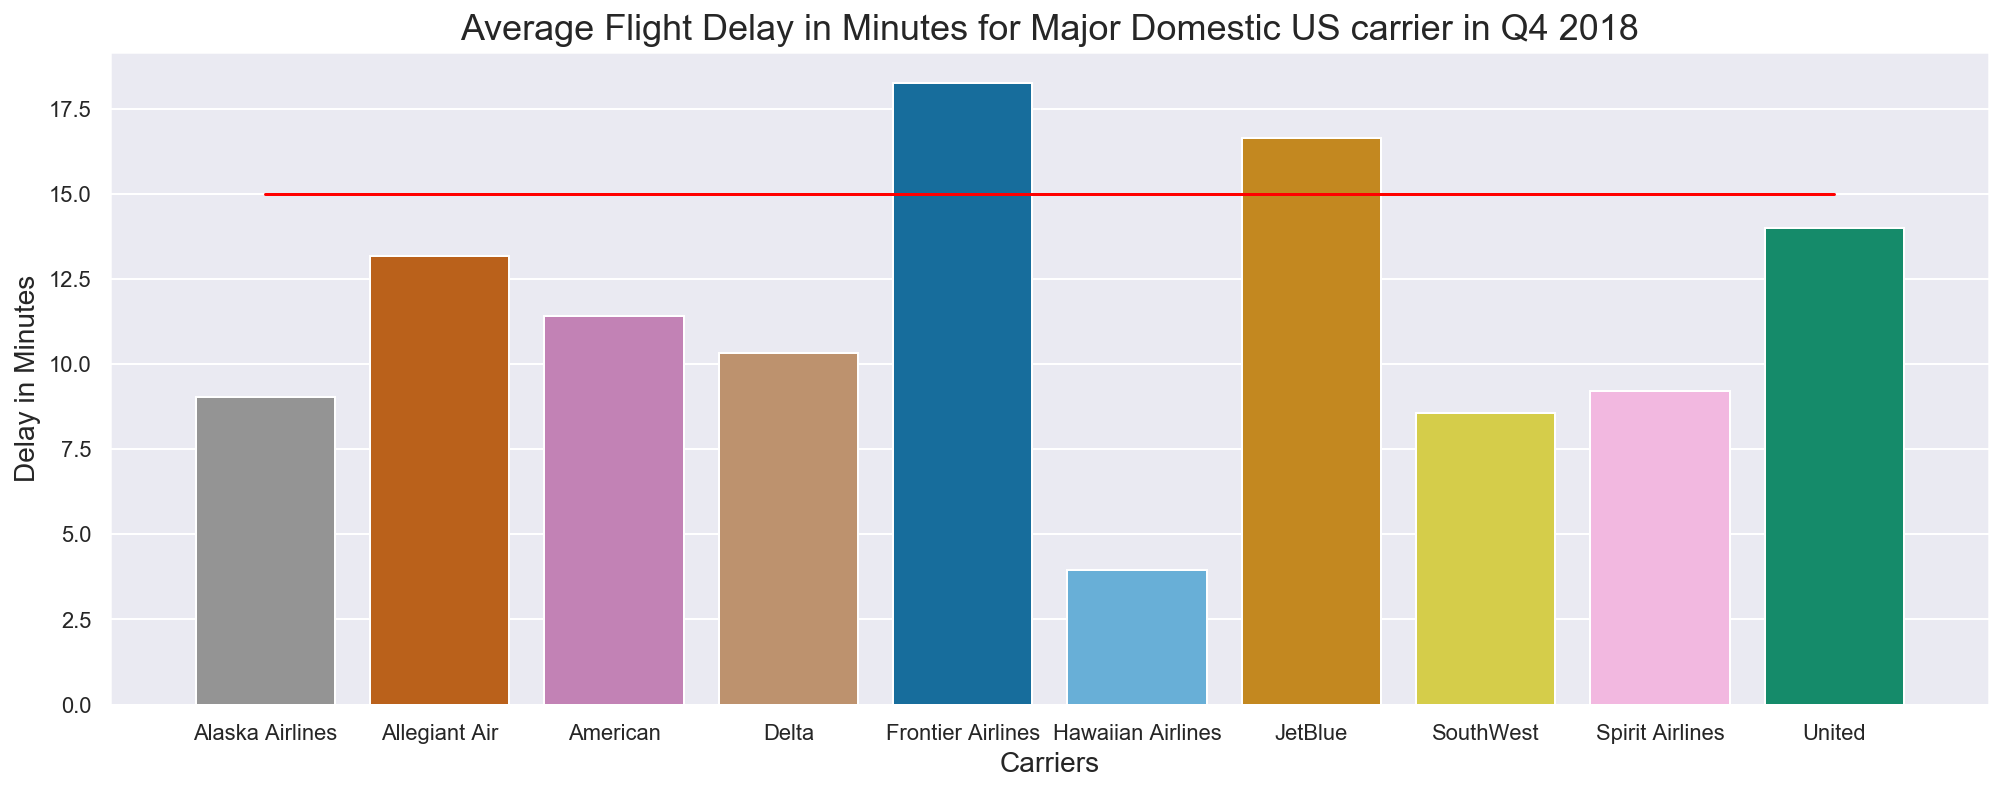

In [144]:
f, ax = plt.subplots(figsize=(15,6))

#Color coding is based on https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
sns.set_color_codes("colorblind")
pal = sns.color_palette("colorblind", len(flights))
rank = delay_by_carrier['total_delay'].argsort().argsort()

sns.barplot(x=delay_by_carrier.index, y=delay_by_carrier['total_delay'], data=delay_by_carrier,
            label="", palette=np.array(pal[::-1])[rank]);

sns.lineplot(x=delay_by_carrier.index, y=15.0, color='red')


# ax.legend( loc="upper right", frameon=True)
# sns.despine(left=True, bottom=True)
plt.title(label = "Average Flight Delay in Minutes for Major Domestic US carrier in Q4 2018", fontsize=18);
plt.ylabel("Delay in Minutes", fontsize=14);
plt.xlabel("Carriers", fontsize=14);

In [28]:
data.columns

Index(['month', 'day_of_month', 'day_of_week', 'fl_date', 'op_carrier',
       'op_carrier_fl_num', 'origin', 'origin_city_name', 'origin_state_abr',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_nm', 'dep_delay', 'arr_delay', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'carrier', 'total_delay'],
      dtype='object')

In [29]:
delay_by_reason = pd.DataFrame(100*round(data[data['total_delay']>0].groupby('carrier')[ 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'].mean(),2))
delay_by_reason

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
carrier,,,,,
Alaska Airlines,20.0,2.0,48.0,0.0,28.0
Allegiant Air,27.0,4.0,23.0,1.0,43.0
American,26.0,3.0,33.0,0.0,35.0
Delta,24.0,4.0,34.0,0.0,36.0
Frontier Airlines,27.0,1.0,30.0,0.0,39.0
Hawaiian Airlines,66.0,2.0,3.0,1.0,28.0
JetBlue,31.0,1.0,30.0,0.0,35.0
SouthWest,29.0,1.0,17.0,0.0,48.0
Spirit Airlines,19.0,1.0,58.0,1.0,19.0


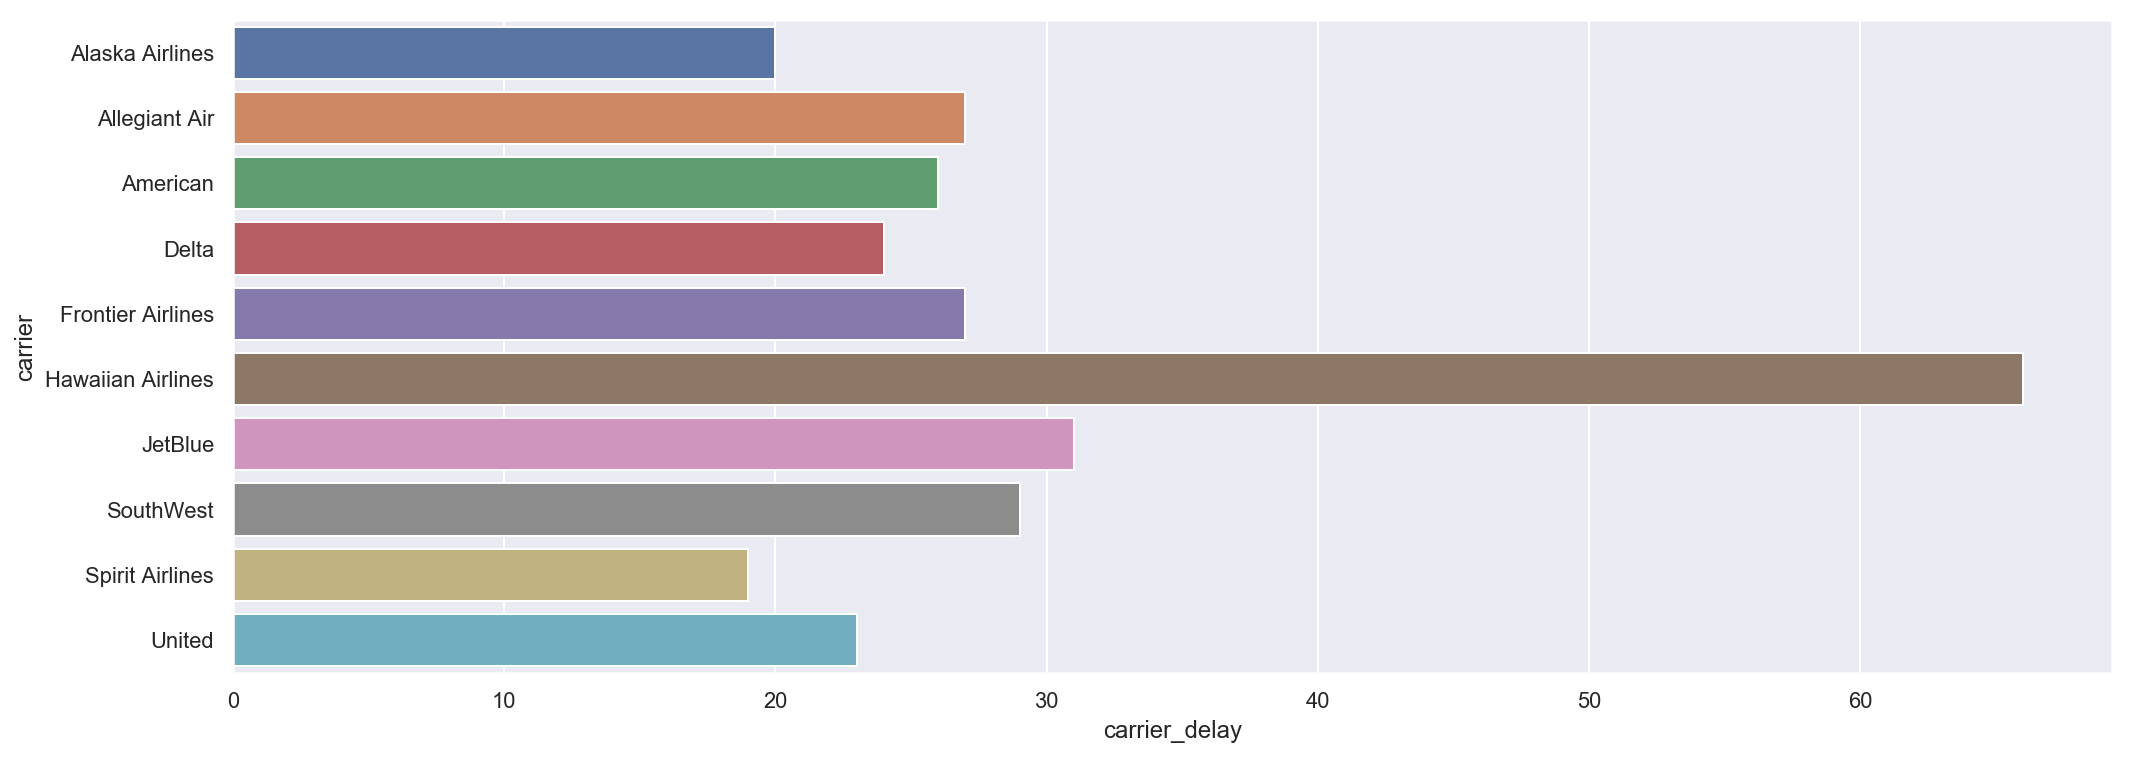

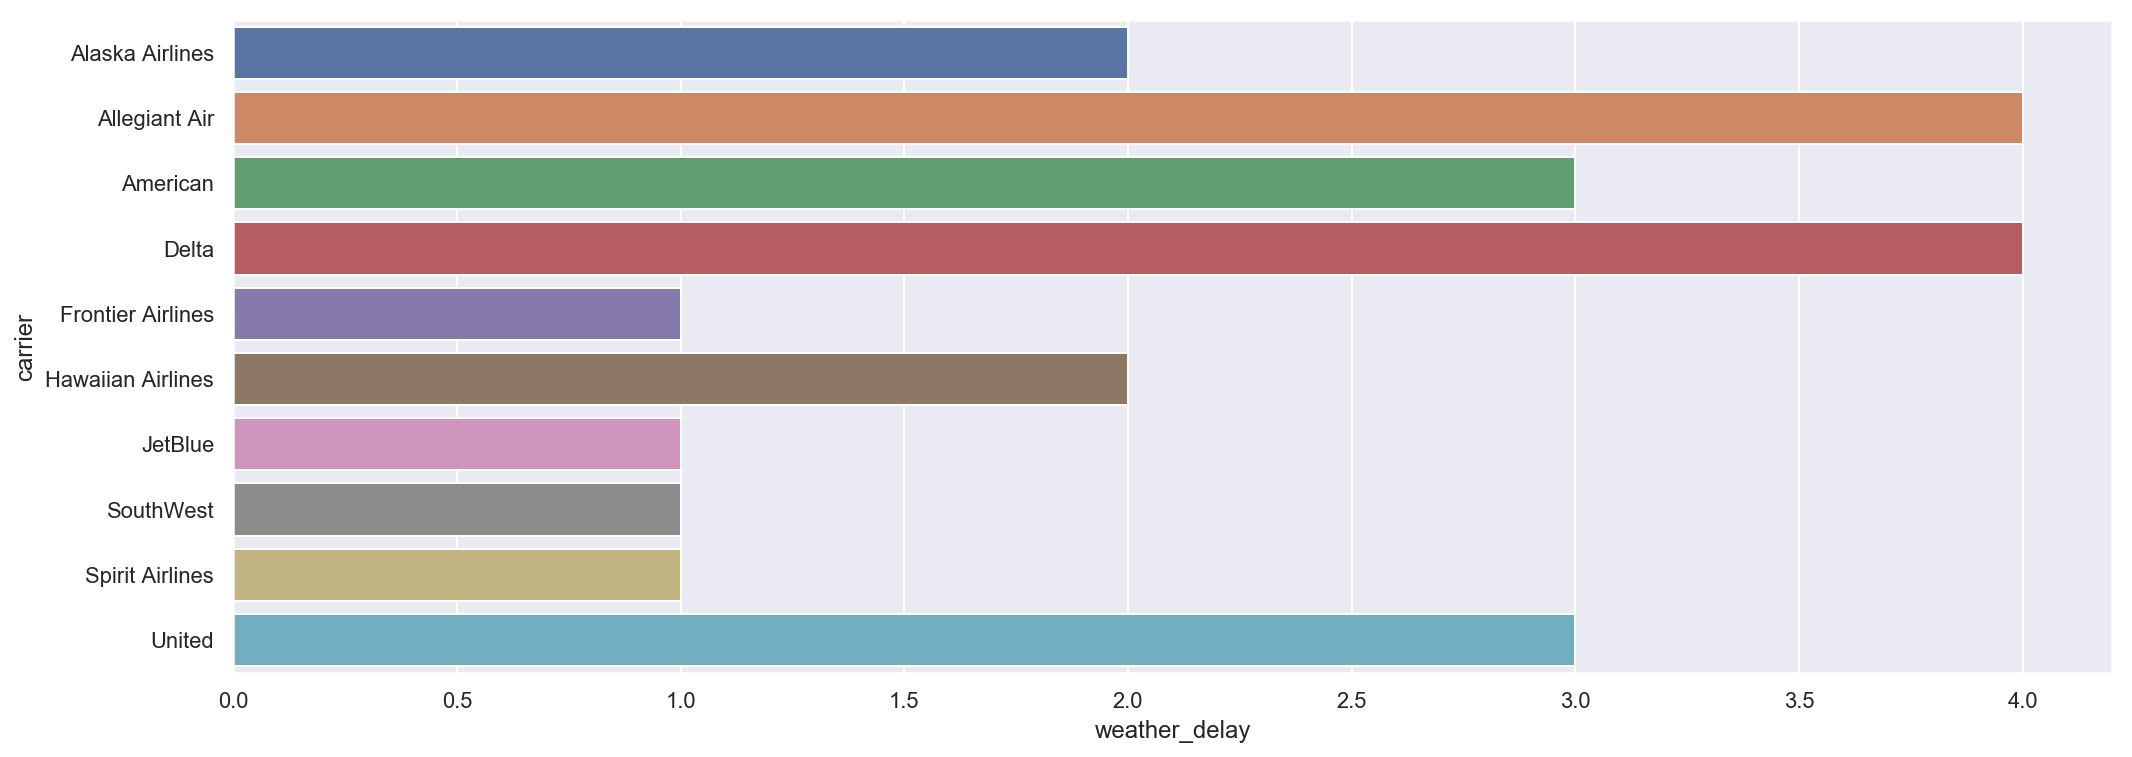

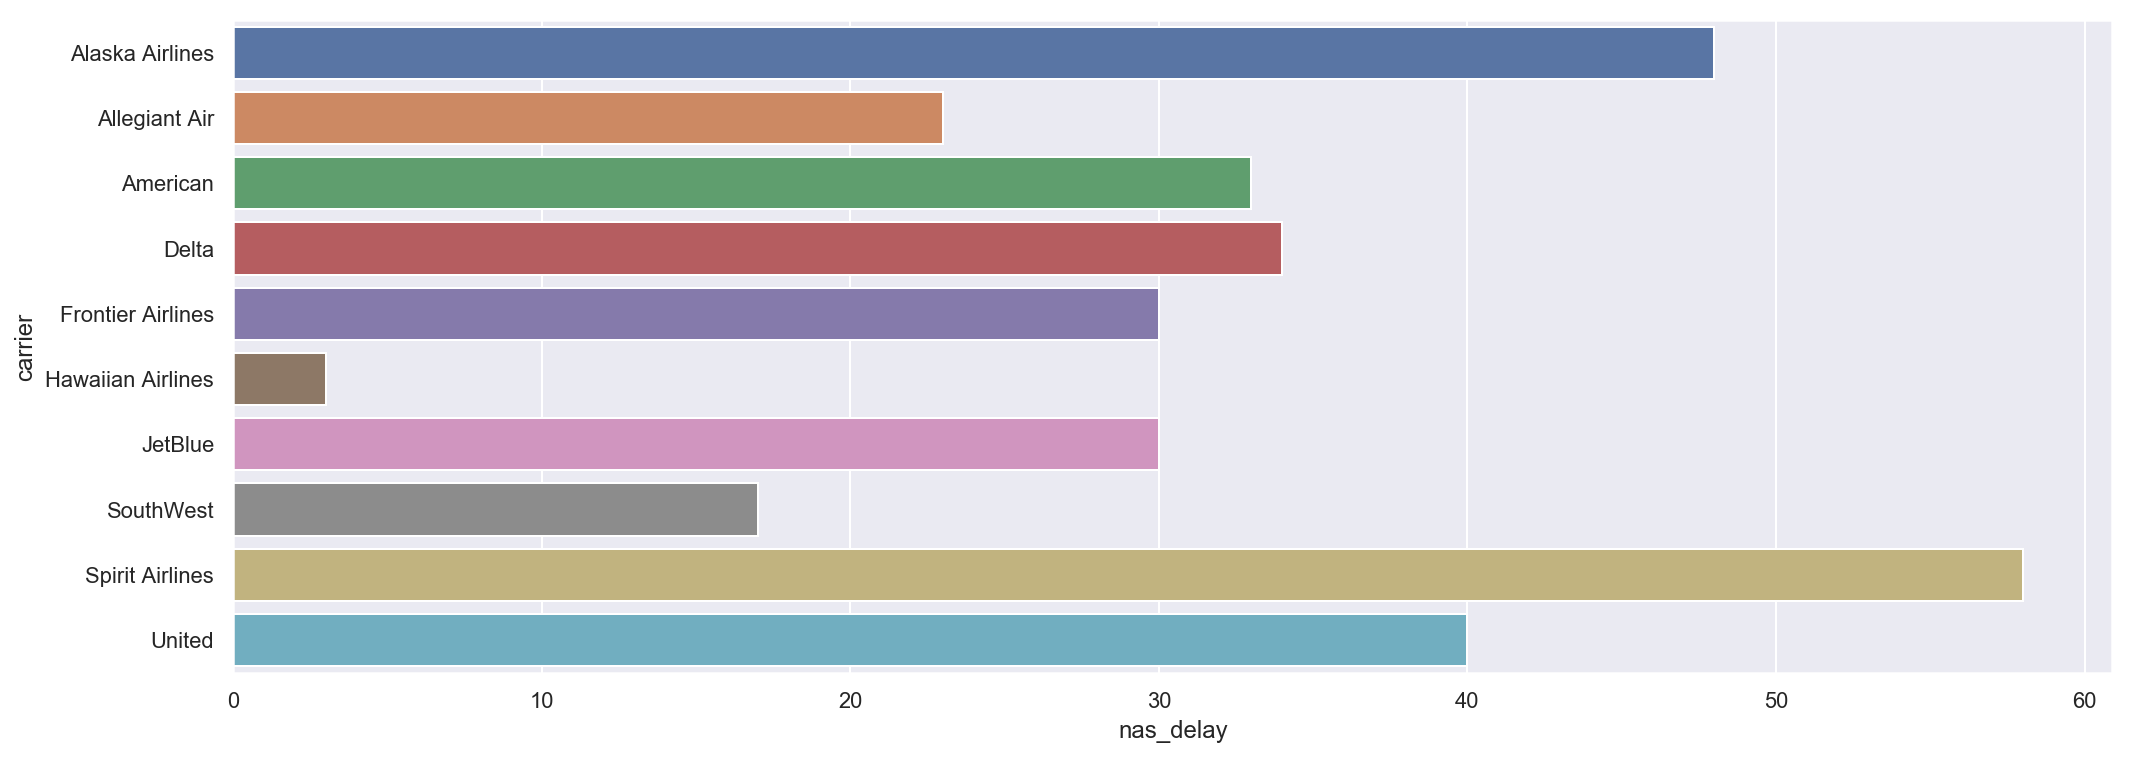

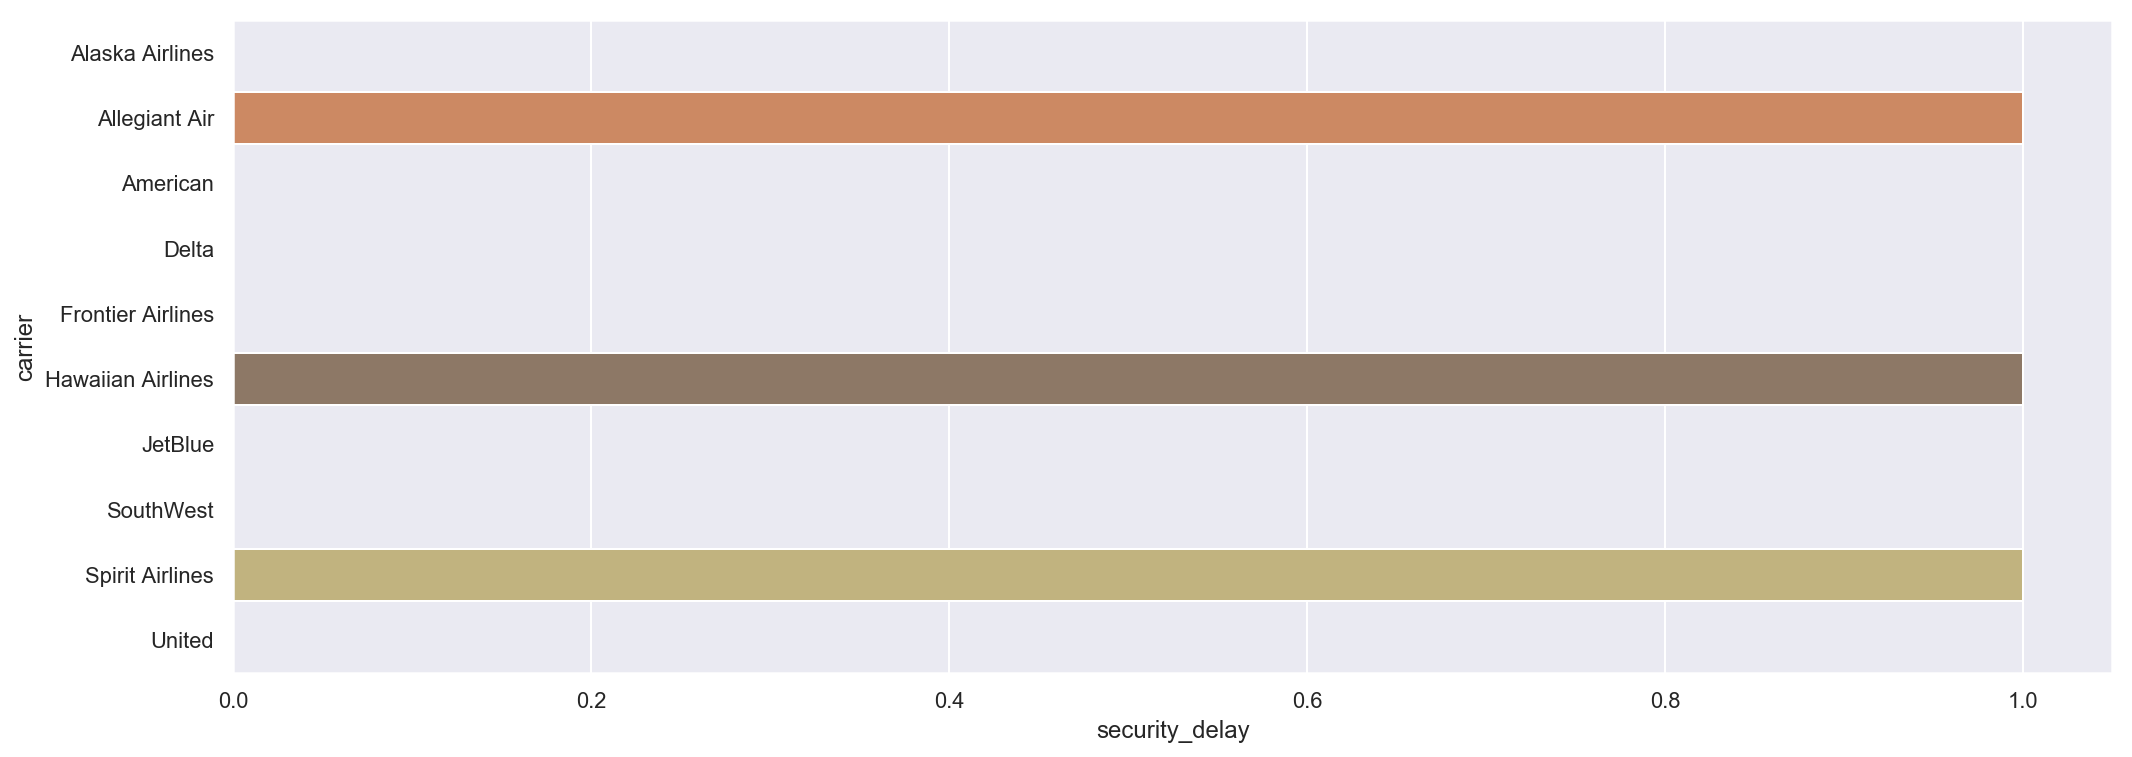

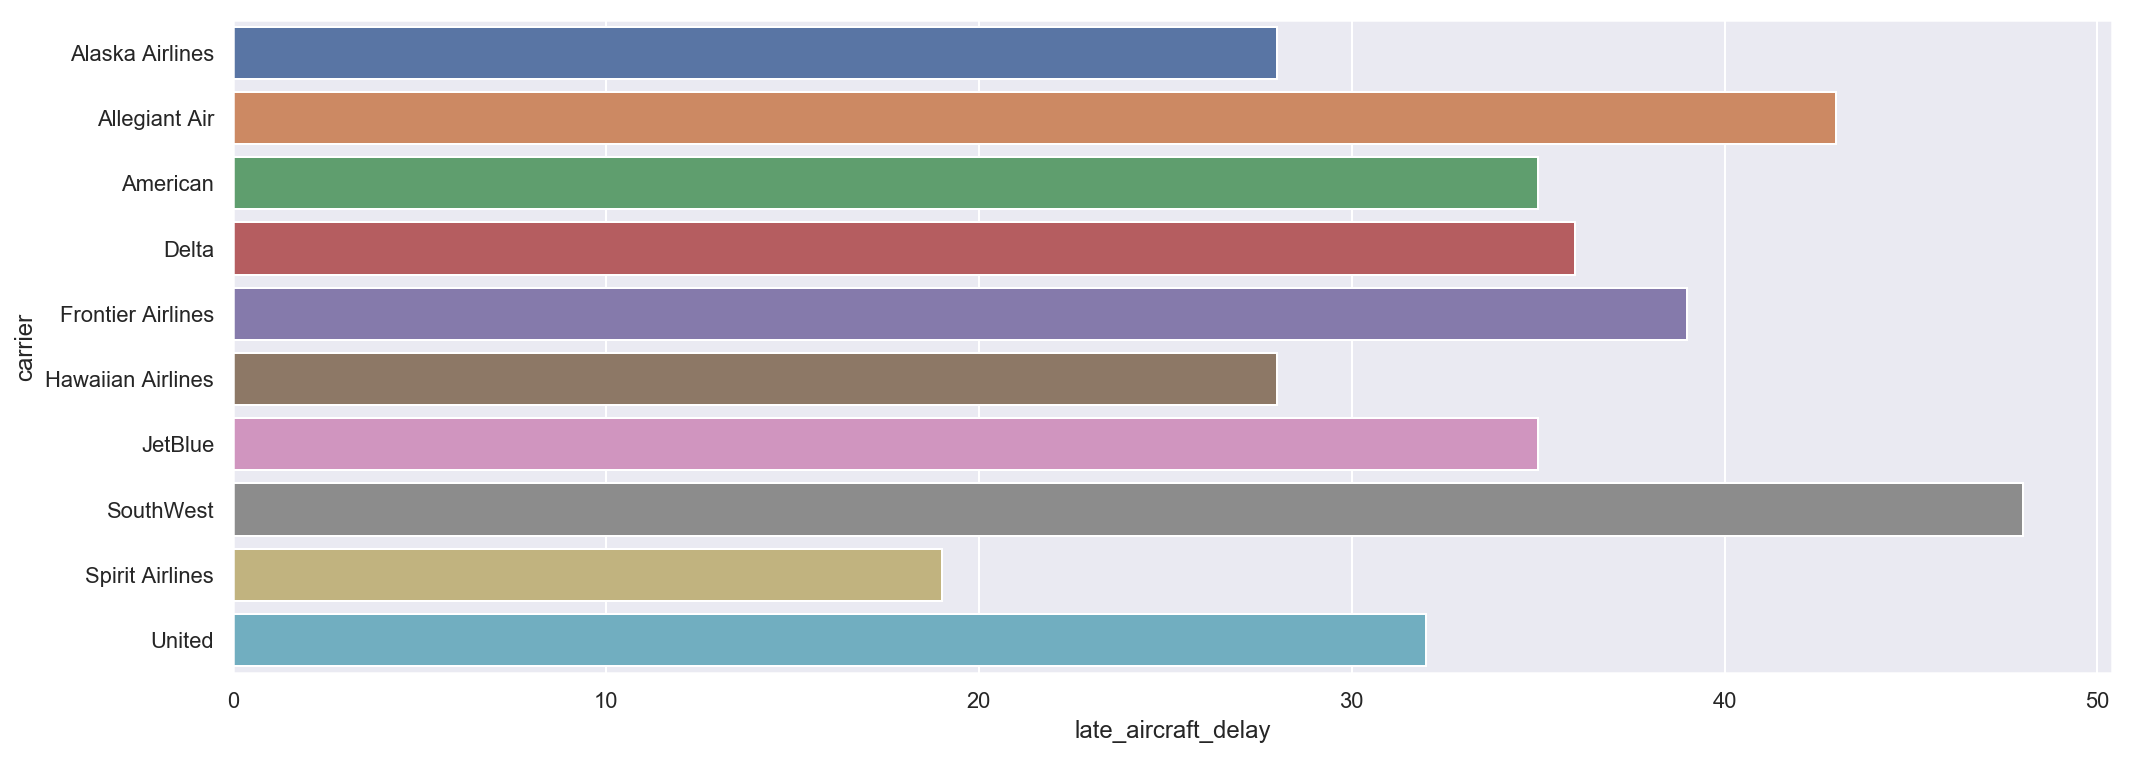

In [143]:
for column in delay_by_reason.columns:
    f, ax = plt.subplots(figsize=(15,6))
    sns.set_color_codes("colorblind")
    sns.barplot(y=delay_by_reason.index, x=delay_by_reason[column], data=delay_by_reason,
                label=column);


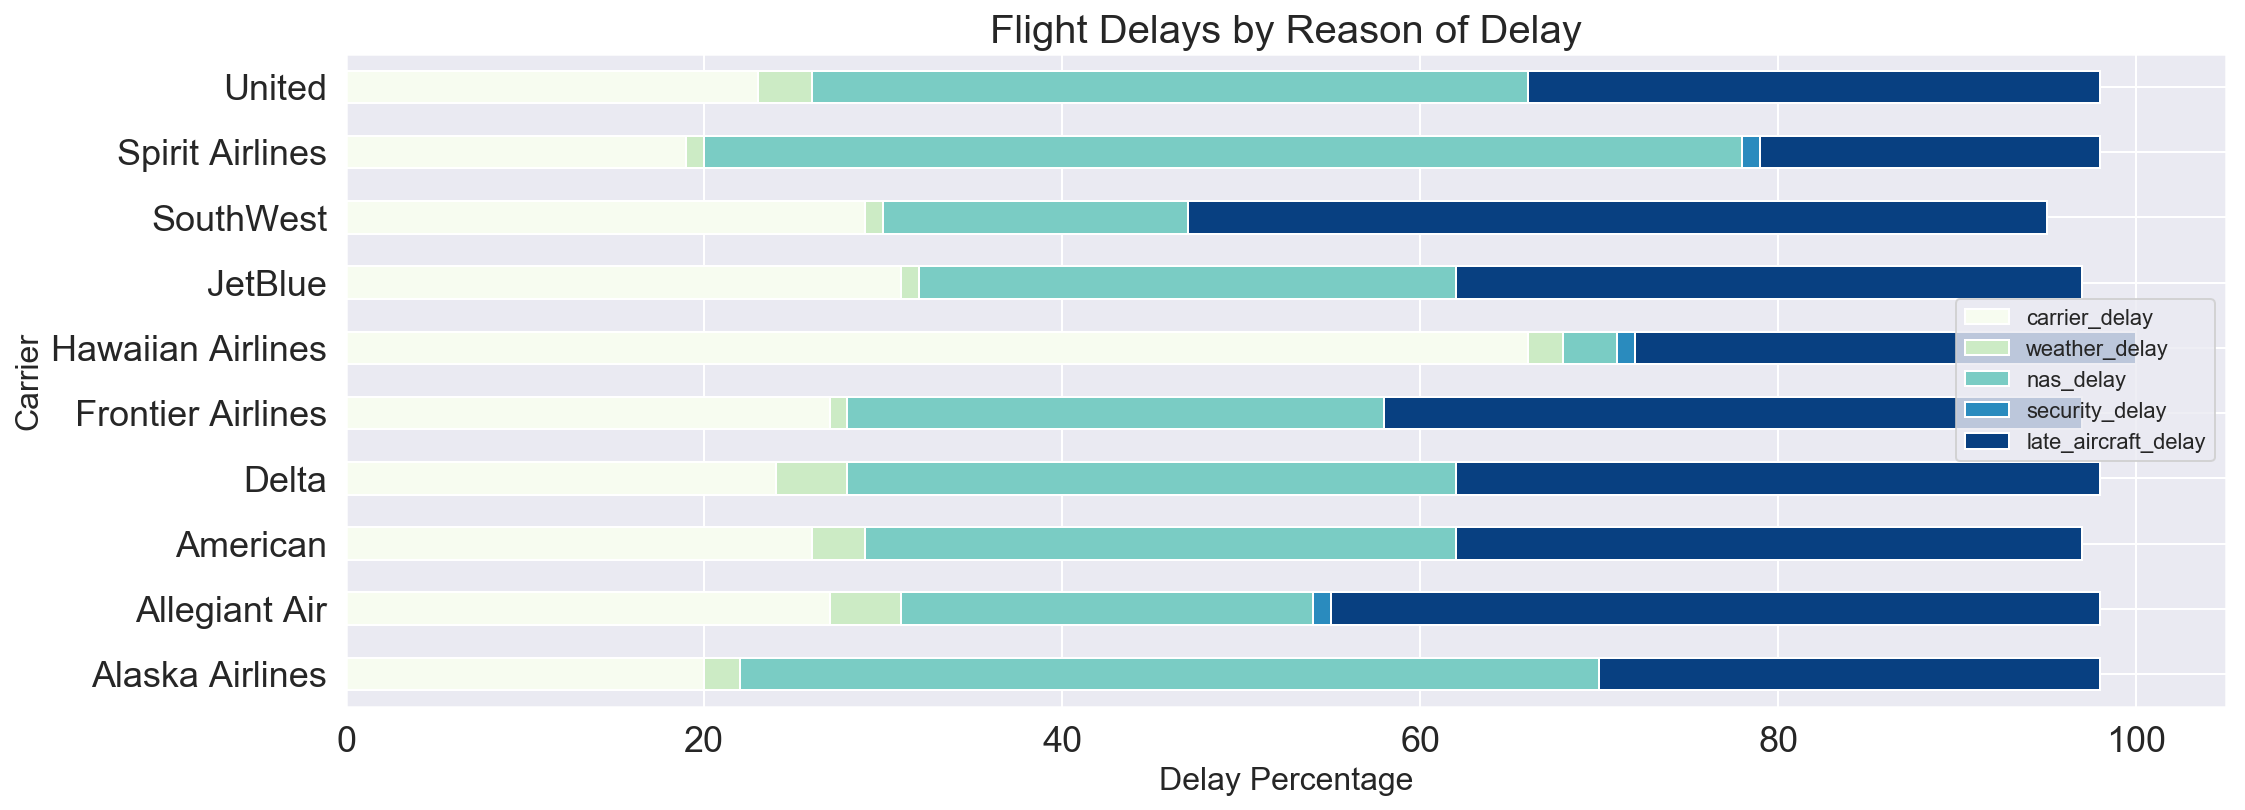

In [141]:
sns.set()

delay_by_reason.plot(kind='barh',
                     figsize=(15,6),
                     stacked=True,
                    fontsize=18,
                    colormap='GnBu');

plt.title('Flight Delays by Reason of Delay', fontsize=20);
plt.xlabel('Delay Percentage', fontsize = 16)
plt.ylabel('Carrier', fontsize = 16)
plt.legend(loc =0);

In [118]:
data['total_delay'].describe()

count    1.775112e+06
mean     1.103770e+01
std      4.169236e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.153000e+03
Name: total_delay, dtype: float64

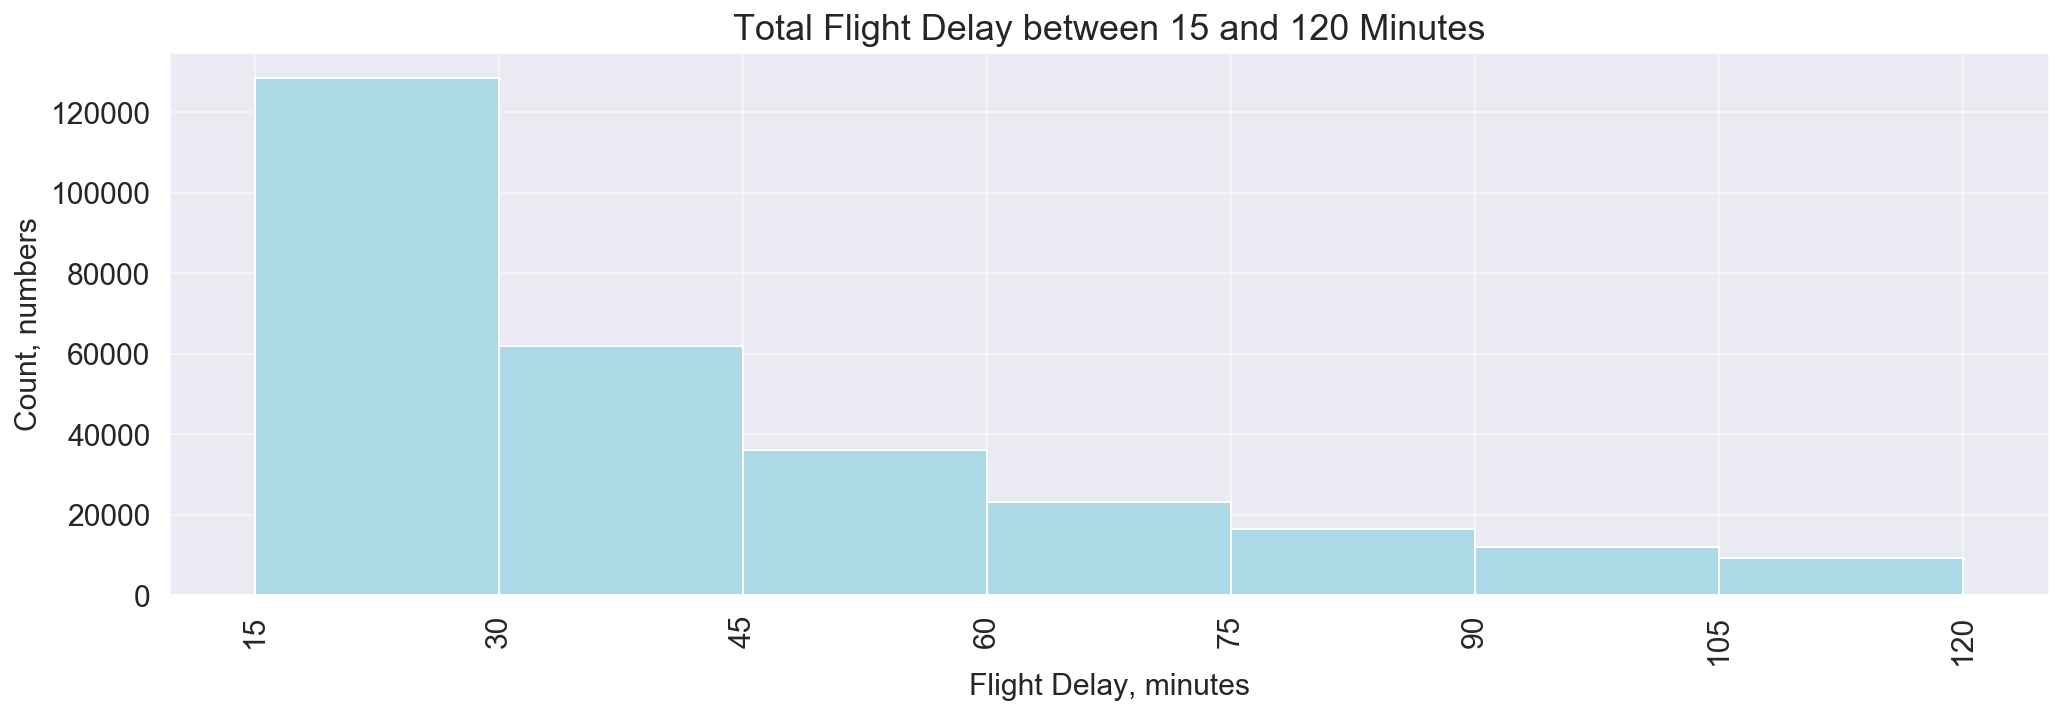

In [140]:
x_min = 15
x_max = 121
x_steps = 15
x_range = list(range(x_min, x_max, x_steps))

plt.figure(figsize = (15,5))
plt.hist(data['total_delay'], color = 'lightblue', bins = x_range);
plt.title('Total Flight Delay between 15 and 120 Minutes', fontsize = 18)
plt.xlabel('Flight Delay, minutes', fontsize=15)
plt.ylabel('Count, numbers', fontsize = 15)
plt.xticks(ticks = x_range, fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.grid( alpha =0.5);

In [145]:
data.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,...,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,total_delay
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,...,-2.0,-17.0,1670.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,...,-2.0,-25.0,1670.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,...,2.0,-13.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,...,-3.0,-12.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,...,1.0,-7.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0


In [148]:
data.to_csv('~/ga/projects/capstone_data/data/data_model.csv')